In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn

In [3]:
%matplotlib inline

In [2]:
df = pd.read_csv('myTrx.csv', thousands=',', parse_dates=['Date'])

In [3]:
df.shape

(71, 6)

In [4]:
df.head()

,Date,Account Name,Description,Category,To With Sym,To Num.
0,2013-05-17,Fuel,Petronas,Credit Card,RM30.00,30.00
1,2013-05-21,Fuel,Petronas,Credit Card,RM91.64,91.64
2,2013-05-28,Fuel,Shell,Credit Card,RM87.61,87.61
3,2013-12-05,Toll,Toll,Cash in Wallet,RM2.30,2.30
4,2013-05-18,Toll,Toll,Cash in Wallet,RM9.60,9.60


In [5]:
df_may13 = df[(df['Date'] >= '2013-05-01') & (df['Date'] < '2013-06-01')]

In [6]:
df_may13['To Num.'].describe()

count      50.000000
mean       71.768800
std       226.727356
min         2.000000
25%         6.850000
50%        10.150000
75%        39.125000
max      1300.000000
Name: To Num., dtype: float64

In [7]:
df_may13.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50 entries, 0 to 70
Data columns (total 6 columns):
Date            50 non-null datetime64[ns]
Account Name    50 non-null object
Description     49 non-null object
Category        50 non-null object
To With Sym     50 non-null object
To Num.         50 non-null float64
dtypes: datetime64[ns](1), float64(1), object(4)
memory usage: 2.7+ KB


In [8]:
df_may13.describe()

,To Num.
count,50.000000
mean,71.768800
std,226.727356
min,2.000000
25%,6.850000
50%,10.150000
75%,39.125000
max,1300.000000


In [9]:
df_may13_group = df_may13.groupby('Date')['To Num.'].sum().to_frame()
df_may13_group.iloc[:,0:2].head()

,To Num.
Date,
2013-05-06,10.88
2013-05-13,9.94
2013-05-14,83.77
2013-05-15,7.30
2013-05-16,26.80


In [10]:
%pylab inline
pylab.rcParams['figure.figsize'] = (15, 6) #changing the graph size

Populating the interactive namespace from numpy and matplotlib


C:\Users\A1825\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['datetime']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [11]:
pd.Series(df_may13_group['To Num.'].values,index=df_may13_group.index)

Date
2013-05-06      10.88
2013-05-13       9.94
2013-05-14      83.77
2013-05-15       7.30
2013-05-16      26.80
2013-05-17      62.91
2013-05-18      70.60
2013-05-19     178.50
2013-05-20     214.41
2013-05-21    1445.64
2013-05-23      16.80
2013-05-24      62.20
2013-05-25      65.20
2013-05-26      10.00
2013-05-27      20.54
2013-05-28    1273.17
2013-05-29       8.50
2013-05-30      18.28
2013-05-31       3.00
dtype: float64

In [12]:
import plotly 
plotly.tools.set_credentials_file(username='aswadi', api_key='FSrA2lPeOMMHNDkSaK7C')

In [13]:
import plotly.plotly as py
# from plotly.graph_objs import *
import plotly.graph_objs as go

# data = [Bar(x=df_may13_group.index,y=df_may13_group['To Num.'].values)]

# Create a trace
trace = go.Scatter(x = df_may13_group.index,y = df_may13_group['To Num.'].values)

# Edit the layout
layout = dict(title = 'Total Spending',xaxis = dict(title = 'date'),yaxis = dict(title = 'Spending(MYR)'),)

data = [trace]

# py.iplot(data, layout = layout)
fig = dict(data=data, layout=layout)
py.iplot(fig, filename='save4dream')

In [11]:
df_new = df

In [12]:
# pd.Series(df_may13_group['To Num.'].values, df_may13_group.index.dt.dayofweek, index=df_may13_group.index)
# pd.Series(df_may13_group.index).dt.dayofweek
df_new['daysofweek'] = df['Date'].dt.weekday
df_new['days'] = df['Date'].dt.weekday_name
df_new['week'] = df['Date'].dt.week

In [13]:
df_new.head()

,Date,Account Name,Description,Category,To With Sym,To Num.,daysofweek,days,week
0,2013-05-17,Fuel,Petronas,Credit Card,RM30.00,30.00,4,Friday,20
1,2013-05-21,Fuel,Petronas,Credit Card,RM91.64,91.64,1,Tuesday,21
2,2013-05-28,Fuel,Shell,Credit Card,RM87.61,87.61,1,Tuesday,22
3,2013-12-05,Toll,Toll,Cash in Wallet,RM2.30,2.30,3,Thursday,49
4,2013-05-18,Toll,Toll,Cash in Wallet,RM9.60,9.60,5,Saturday,20


In [14]:
df_new_may13 = df_new[(df_new['Date'] >= '2013-05-01') & (df_new['Date'] < '2013-06-01')]
dataset = df_new_may13.groupby(['week','daysofweek'])['To Num.'].sum().to_frame().reset_index()

In [15]:
dataset.columns = ['week','daysofweek','spending']

In [16]:
# dataset[(dataset['week'] == 20)]['week'].values
test = dataset[(dataset['week'] == 20)][['daysofweek','spending']]

In [17]:
test = dataset[(dataset['week'] == 20)][['daysofweek','To Num.']].to_json(orient='values').replace(',', ':').replace(']:[',',').replace('[[','{').replace(']]','}')

import ast
ast.literal_eval(test)

KeyError: "['To Num.'] not in index"

In [ ]:
from luminol.anomaly_detector import AnomalyDetector
from luminol.correlator import Correlator


In [43]:
from luminol.anomaly_detector import AnomalyDetector
from luminol.correlator import Correlator

ts1 = {0: 0, 1: 0.5, 2: 1, 3: 1, 4: 1, 5: 0, 6: 0, 7: 0, 8: 0}
ts2 = {0: 0, 1: 0.5, 2: 1, 3: 1, 4: 1, 5: 0, 6: 1, 7: 1,8: 1}

my_detector = AnomalyDetector(ts1, score_threshold=1.5)
score = my_detector.get_all_scores()
anomalies = my_detector.get_anomalies()
for a in anomalies:
    time_period = a.get_time_window()
    print("This is anomaly_score: {}".format(a.anomaly_score))
    my_correlator = Correlator(ts1, ts2, time_period)
    if my_correlator.is_correlated(threshold=0.8):
        print("ts2 correlate with ts1 at time period (%d, %d)" % time_period)
        print("This is score:{}" .format(score))

This is anomaly_score: 2.905418134146207
ts2 correlate with ts1 at time period (2, 5)
This is score:(0, 0.0)(1, 0.8731282501307988)(2, 1.5716308502354377)(3, 2.1363368633427995)(4, 1.70906949067424)(5, 2.905418134146207)(6, 1.1715411093483696)(7, 0.9372328874786957)(8, 0.7497863099829566)


In [38]:
??AnomalyDetector

Init signature: AnomalyDetector(time_series, baseline_time_series=None, score_only=False, score_threshold=None, score_percent_threshold=None, algorithm_name=None, algorithm_params=None, refine_algorithm_name=None, refine_algorithm_params=None, algorithm_class=None)
Source:        
class AnomalyDetector(object):

    def __init__(self, time_series, baseline_time_series=None, score_only=False, score_threshold=None,
                 score_percent_threshold=None, algorithm_name=None, algorithm_params=None, refine_algorithm_name=None,
                 refine_algorithm_params=None, algorithm_class=None):
        """
        Initializer
        :param time_series: a TimeSeries, a dictionary or a path to a csv file(str).
        :param baseline_time_series: a TimeSeries, a dictionary or a path to a csv file(str).
        :param bool score_only: if asserted, only anomaly scores are computed.
        :param float score_percent_threshold: percent threshold on anomaly score above which is consider

In [18]:
df_new3 = df_new[(df_new['Date'] >= '2013-05-13') & (df_new['Date'] < '2013-06-01')]

In [20]:
df_new['y'] = df_new['To Num.']

In [21]:
df_new['DS'] = df_new['Date']

In [22]:
df_new.head()

,Date,Account Name,Description,Category,To With Sym,To Num.,daysofweek,days,week,y,DS
0,2013-05-17,Fuel,Petronas,Credit Card,RM30.00,30.00,4,Friday,20,30.00,2013-05-17
1,2013-05-21,Fuel,Petronas,Credit Card,RM91.64,91.64,1,Tuesday,21,91.64,2013-05-21
2,2013-05-28,Fuel,Shell,Credit Card,RM87.61,87.61,1,Tuesday,22,87.61,2013-05-28
3,2013-12-05,Toll,Toll,Cash in Wallet,RM2.30,2.30,3,Thursday,49,2.30,2013-12-05
4,2013-05-18,Toll,Toll,Cash in Wallet,RM9.60,9.60,5,Saturday,20,9.60,2013-05-18


In [23]:
df_new2 = df_new[['DS','y']]

In [24]:
df_new2.head()
df_new2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
DS    71 non-null datetime64[ns]
y     71 non-null float64
dtypes: datetime64[ns](1), float64(1)
memory usage: 1.2 KB


In [25]:
from fbprophet import Prophet
m = Prophet()

In [30]:
df_new2.head()

,ds,y
0,2013-05-17,30.00
1,2013-05-21,91.64
2,2013-05-28,87.61
3,2013-12-05,2.30
4,2013-05-18,9.60


In [31]:
m.fit(df_new2)

INFO:fbprophet.forecaster:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [34]:
predict = m.predict(df_new2)

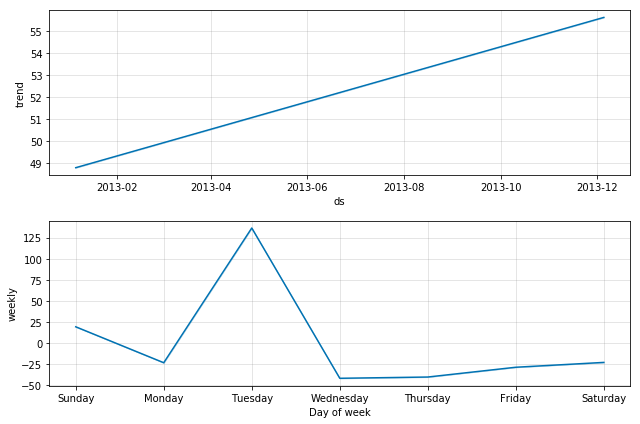

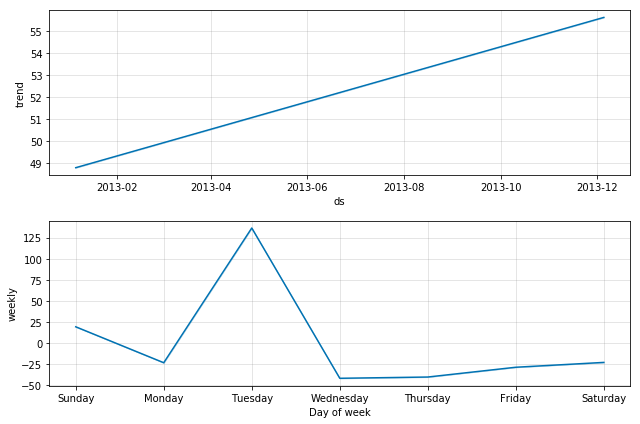

In [36]:
m.plot_components(predict)

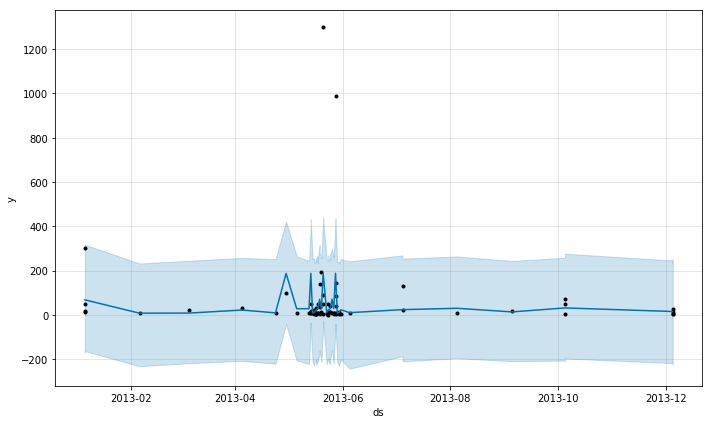

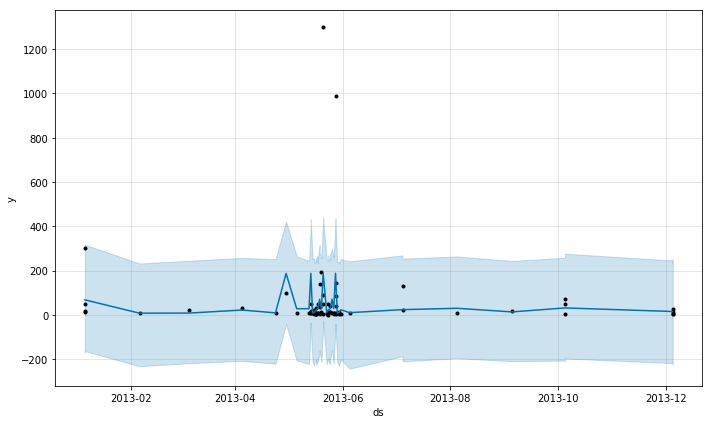

In [35]:
m.plot(predict)

In [29]:
df_new2.columns = ['ds','y']

In [65]:
test3 = test2.reset_index()

In [84]:
test3.loc[(test3['ds'] == '2013-05-21'), 'y'] = None
test3.loc[(test3['ds'] == '2013-05-28'), 'y'] = None

In [70]:
test3.columns = ['ds','y']

In [88]:
m.fit(test3);

INFO:fbprophet.forecaster:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet.forecaster:n_changepoints greater than number of observations.Using 11.0.


In [89]:
future = m.make_future_dataframe(periods=30)
future.tail()

,ds
43,2013-06-26
44,2013-06-27
45,2013-06-28
46,2013-06-29
47,2013-06-30


In [90]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
43,2013-06-26,30.662532,-42.372064,104.157978
44,2013-06-27,38.349423,-32.447431,111.523306
45,2013-06-28,58.633008,-9.873690,128.190103
46,2013-06-29,74.257455,-0.105415,140.894960
47,2013-06-30,93.100113,22.316538,166.431509


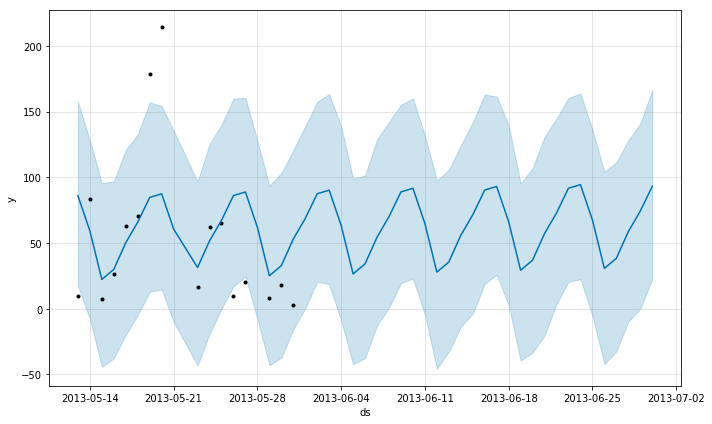

In [91]:
%matplotlib inline
m.plot(forecast);

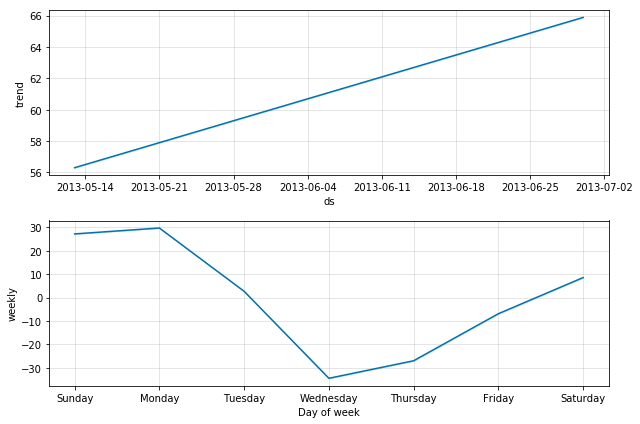

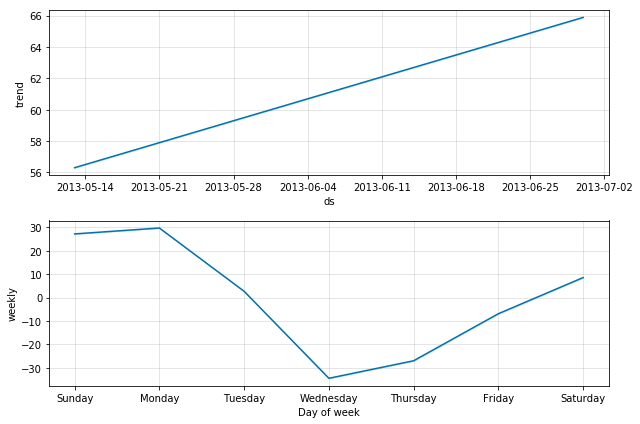

In [92]:
m.plot_components(forecast)

In [38]:
df = df_new

df_trx = df[['DS','y']]
df_trx.columns = ['ds','y']

In [43]:
df.head()

,Date,Account Name,Description,Category,To With Sym,To Num.,daysofweek,days,week,y,DS
0,2013-05-17,Fuel,Petronas,Credit Card,RM30.00,30.00,4,Friday,20,30.00,2013-05-17
1,2013-05-21,Fuel,Petronas,Credit Card,RM91.64,91.64,1,Tuesday,21,91.64,2013-05-21
2,2013-05-28,Fuel,Shell,Credit Card,RM87.61,87.61,1,Tuesday,22,87.61,2013-05-28
3,2013-12-05,Toll,Toll,Cash in Wallet,RM2.30,2.30,3,Thursday,49,2.30,2013-12-05
4,2013-05-18,Toll,Toll,Cash in Wallet,RM9.60,9.60,5,Saturday,20,9.60,2013-05-18


In [52]:
df['week'].value_counts()

20    20
21    16
22    13
49     4
1      4
40     3
27     2
36     1
32     1
23     1
19     1
18     1
17     1
14     1
10     1
6      1
Name: week, dtype: int64

In [95]:
df_group = df.groupby(['week','daysofweek','DS'],as_index=False)[['To Num.']].sum()
df_group[df_group['week']==21]

,week,daysofweek,DS,To Num.
14,21,0,2013-05-20,214.41
15,21,1,2013-05-21,1445.64
16,21,3,2013-05-23,16.80
17,21,4,2013-05-24,62.20
18,21,5,2013-05-25,65.20
19,21,6,2013-05-26,10.00


### start new analysis

In [2]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn

In [3]:
%matplotlib inline

In [5]:
df = pd.read_csv('myTrx.csv', thousands=',', parse_dates=['Date'])
df.columns = ['date','acc_name','description','category','amount_rm','amount']
df.head()

,date,acc_name,description,category,amount_rm,amount
0,2013-05-17,Fuel,Petronas,Credit Card,RM30.00,30.00
1,2013-05-21,Fuel,Petronas,Credit Card,RM91.64,91.64
2,2013-05-28,Fuel,Shell,Credit Card,RM87.61,87.61
3,2013-12-05,Toll,Toll,Cash in Wallet,RM2.30,2.30
4,2013-05-18,Toll,Toll,Cash in Wallet,RM9.60,9.60


In [8]:
df['daysofweek'] = df['date'].dt.weekday
df['days'] = df['date'].dt.weekday_name
df['week'] = df['date'].dt.week

In [11]:
df_group = df.groupby(['week','daysofweek','date'],as_index=False)[['amount']].sum()
df_group[df_group['week']==21]

,week,daysofweek,date,amount
14,21,0,2013-05-20,214.41
15,21,1,2013-05-21,1445.64
16,21,3,2013-05-23,16.80
17,21,4,2013-05-24,62.20
18,21,5,2013-05-25,65.20
19,21,6,2013-05-26,10.00


In [13]:
df_trx = df_group[['date','amount']][(df_group['week']>=20) & (df_group['week']<=21)]
df_trx.columns = ['ds','y']

In [14]:
from fbprophet import Prophet
m = Prophet(weekly_seasonality=True)

m.fit(df_trx)

INFO:fbprophet.forecaster:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet.forecaster:n_changepoints greater than number of observations.Using 9.0.


In [108]:
df_trx.head()

,ds,y,norm_y,sd_y
7,2013-05-13,9.94,0.001835,-0.438990
8,2013-05-14,83.77,0.053165,-0.240699
9,2013-05-15,7.30,0.000000,-0.446080
10,2013-05-16,26.80,0.013557,-0.393707
11,2013-05-17,62.91,0.038663,-0.296724


In [34]:
forecast[['ds','yhat']].head()

,ds,yhat
0,2013-05-13,99.789295
1,2013-05-14,705.821312
2,2013-05-15,53.305173
3,2013-05-16,18.109421
4,2013-05-17,55.605352


In [18]:
future = m.make_future_dataframe(periods=14)
future['floor'] = 0
future.tail()

,ds,floor
22,2013-06-05,0
23,2013-06-06,0
24,2013-06-07,0
25,2013-06-08,0
26,2013-06-09,0


In [19]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
22,2013-06-05,203.132311,-142.579762,532.570416
23,2013-06-06,167.936558,-186.720083,474.473573
24,2013-06-07,205.432488,-123.809430,520.327849
25,2013-06-08,209.834060,-131.254904,549.901285
26,2013-06-09,233.701479,-97.368599,570.919553


In [91]:
forecast.head()

,ds,trend,trend_lower,trend_upper,yhat_lower,yhat_upper,seasonal,seasonal_lower,seasonal_upper,seasonalities,seasonalities_lower,seasonalities_upper,weekly,weekly_lower,weekly_upper,yhat
0,2013-05-13,132.383524,132.383524,132.383524,-244.544797,459.567615,-32.594229,-32.594229,-32.594229,-32.594229,-32.594229,-32.594229,-32.594229,-32.594229,-32.594229,99.789295
1,2013-05-14,139.518150,139.518150,139.518150,358.344169,1030.764606,566.303162,566.303162,566.303162,566.303162,566.303162,566.303162,566.303162,566.303162,566.303162,705.821312
2,2013-05-15,146.652776,146.652776,146.652776,-284.335542,397.075617,-93.347603,-93.347603,-93.347603,-93.347603,-93.347603,-93.347603,-93.347603,-93.347603,-93.347603,53.305173
3,2013-05-16,153.787403,153.787403,153.787403,-304.475217,332.319413,-135.677982,-135.677982,-135.677982,-135.677982,-135.677982,-135.677982,-135.677982,-135.677982,-135.677982,18.109421
4,2013-05-17,160.922029,160.922029,160.922029,-264.460114,381.182514,-105.316678,-105.316678,-105.316678,-105.316678,-105.316678,-105.316678,-105.316678,-105.316678,-105.316678,55.605352


In [106]:
today_spend = 200
today_predict = forecast.set_index('ds', drop = False).loc['2013-06-09','yhat']
percent_used = today_spend / today_predict * 100

if percent_used <= 100:
    print('You have save {:.0f}% today.'.format(100 - percent_used))
else:
    print('You have exceed spending of {:.0f}% today.'.format(percent_used - 100))

You have save 14% today.


In [57]:
forecast.tail()

,ds,trend,trend_lower,trend_upper,yhat_lower,yhat_upper,seasonal,seasonal_lower,seasonal_upper,seasonalities,seasonalities_lower,seasonalities_upper,weekly,weekly_lower,weekly_upper,yhat
22,2013-06-05,296.479914,296.479873,296.479955,-142.579762,532.570416,-93.347603,-93.347603,-93.347603,-93.347603,-93.347603,-93.347603,-93.347603,-93.347603,-93.347603,203.132311
23,2013-06-06,303.614540,303.614492,303.614585,-186.720083,474.473573,-135.677982,-135.677982,-135.677982,-135.677982,-135.677982,-135.677982,-135.677982,-135.677982,-135.677982,167.936558
24,2013-06-07,310.749165,310.749112,310.749218,-123.809430,520.327849,-105.316678,-105.316678,-105.316678,-105.316678,-105.316678,-105.316678,-105.316678,-105.316678,-105.316678,205.432488
25,2013-06-08,317.883791,317.883731,317.883850,-131.254904,549.901285,-108.049731,-108.049731,-108.049731,-108.049731,-108.049731,-108.049731,-108.049731,-108.049731,-108.049731,209.834060
26,2013-06-09,325.018417,325.018347,325.018483,-97.368599,570.919553,-91.316938,-91.316938,-91.316938,-91.316938,-91.316938,-91.316938,-91.316938,-91.316938,-91.316938,233.701479


In [29]:
result = pd.merge(df_trx, forecast[['ds','yhat']], how='left', on=['ds'])
result.head()

,ds,y,yhat
0,2013-05-13,9.94,99.789295
1,2013-05-14,83.77,705.821312
2,2013-05-15,7.30,53.305173
3,2013-05-16,26.80,18.109421
4,2013-05-17,62.91,55.605352


In [111]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

print('result r2: ', r2_score(result.y, result.yhat))
print('result MSE: ', mean_squared_error(result.y, result.yhat))
print('result MAE: ', mean_absolute_error(result.y, result.yhat))
print('result RMSE: ', ((result.y - result.yhat) ** 2).mean() ** .5)

result r2:  0.496016011218
result MSE:  69867.9828755
result MAE:  145.910763641
result RMSE:  264.3255244494723


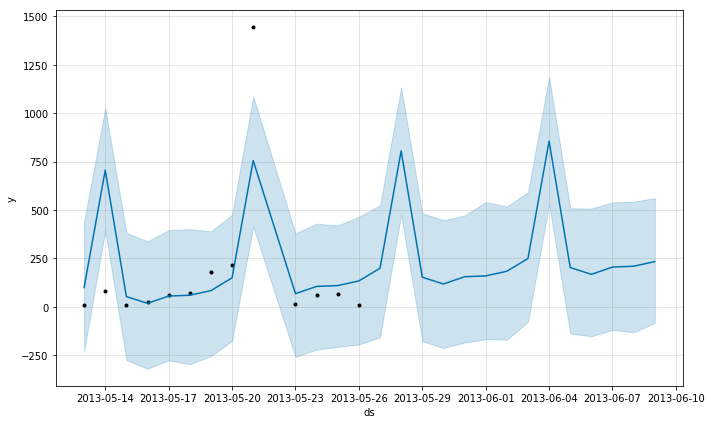

In [132]:
m.plot(forecast);

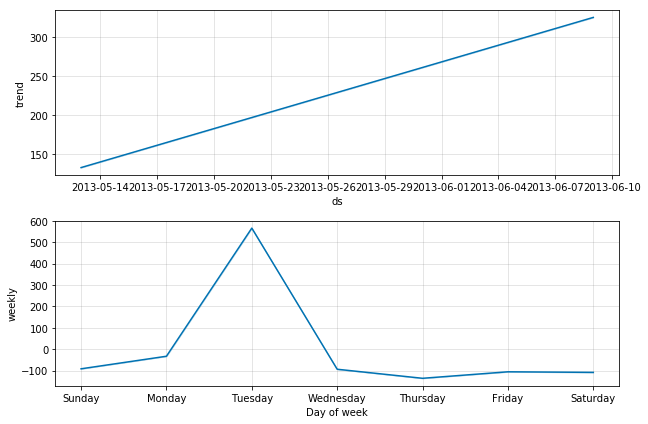

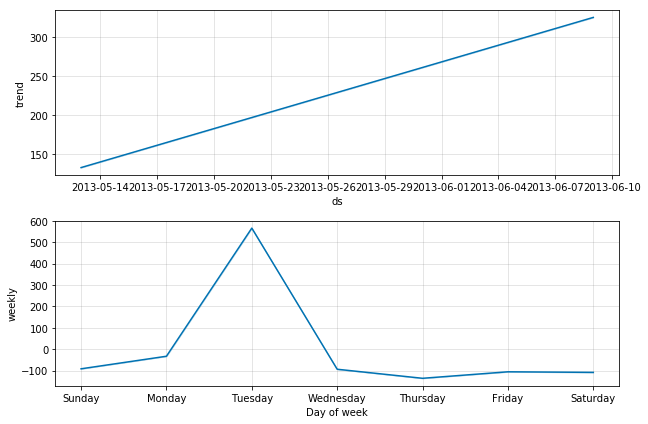

In [109]:
m.plot_components(forecast)

In [115]:
forecast['week'] = forecast['ds'].dt.week

In [56]:
forecast.head()

,ds,trend,trend_lower,trend_upper,yhat_lower,yhat_upper,seasonal,seasonal_lower,seasonal_upper,seasonalities,seasonalities_lower,seasonalities_upper,weekly,weekly_lower,weekly_upper,yhat
0,2013-05-13,132.383524,132.383524,132.383524,-244.544797,459.567615,-32.594229,-32.594229,-32.594229,-32.594229,-32.594229,-32.594229,-32.594229,-32.594229,-32.594229,99.789295
1,2013-05-14,139.518150,139.518150,139.518150,358.344169,1030.764606,566.303162,566.303162,566.303162,566.303162,566.303162,566.303162,566.303162,566.303162,566.303162,705.821312
2,2013-05-15,146.652776,146.652776,146.652776,-284.335542,397.075617,-93.347603,-93.347603,-93.347603,-93.347603,-93.347603,-93.347603,-93.347603,-93.347603,-93.347603,53.305173
3,2013-05-16,153.787403,153.787403,153.787403,-304.475217,332.319413,-135.677982,-135.677982,-135.677982,-135.677982,-135.677982,-135.677982,-135.677982,-135.677982,-135.677982,18.109421
4,2013-05-17,160.922029,160.922029,160.922029,-264.460114,381.182514,-105.316678,-105.316678,-105.316678,-105.316678,-105.316678,-105.316678,-105.316678,-105.316678,-105.316678,55.605352


scaling the data so that it can be used by other user

In [35]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [48]:
df_trx.head()

,ds,y
7,2013-05-13,9.94
8,2013-05-14,83.77
9,2013-05-15,7.30
10,2013-05-16,26.80
11,2013-05-17,62.91


In [52]:
# MinMax = MinMaxScaler().fit_(df_trx[['y']])
# df_ms = MinMax.transform(df_trx[['ds','y']])
df_ms = MinMaxScaler().fit_transform(df_trx[['y']]) #simplify code
df_sd = StandardScaler().fit_transform(df_trx[['y']])

In [53]:
# for i in range(5):
#     print(df_ms[i])
    
df_trx['norm_y'] = df_ms
df_trx['sd_y'] = df_sd

[ 0.00183545]
[ 0.05316545]
[ 0.]
[ 0.0135573]
[ 0.03866262]


In [55]:
df_trx.head()

,ds,y,norm_y,sd_y
7,2013-05-13,9.94,0.001835,-0.438990
8,2013-05-14,83.77,0.053165,-0.240699
9,2013-05-15,7.30,0.000000,-0.446080
10,2013-05-16,26.80,0.013557,-0.393707
11,2013-05-17,62.91,0.038663,-0.296724


### Final Script